In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

In [2]:
df= pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
original_cols = df.columns
original_cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

[]

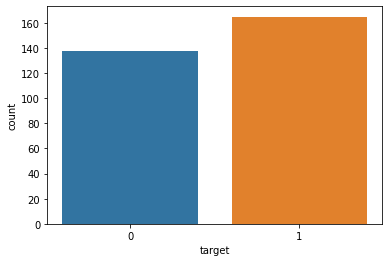

In [7]:
sns.countplot(x="target", data=df)
plt.plot()

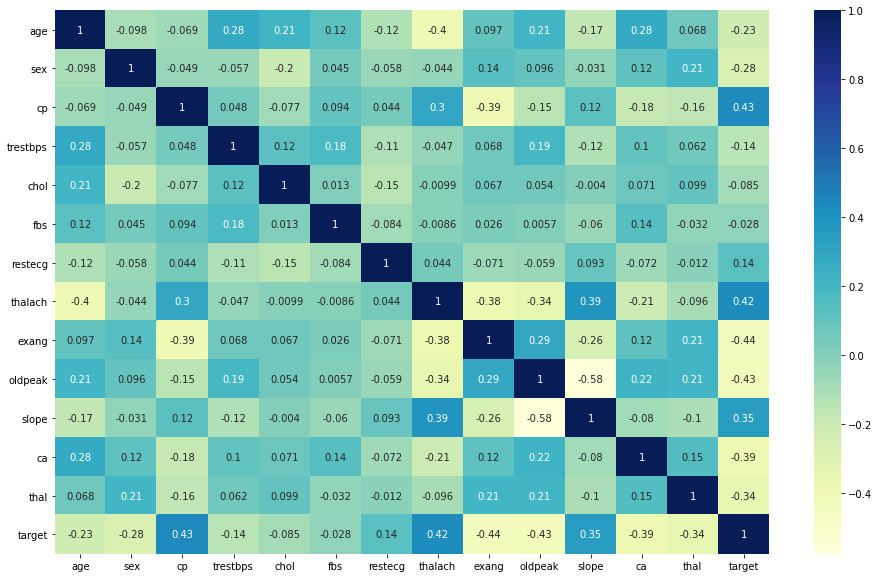

In [8]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [9]:
a = pd.get_dummies(df['cp'], prefix="cp")
b = pd.get_dummies(df['thal'], prefix="thal")
c = pd.get_dummies(df['slope'], prefix="slope")

frames = [df, a, b, c]
df_new = pd.concat(frames, axis = 1)
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [10]:
df_new.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0,0,0,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,1,0,0,0,1,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,0,0,0,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1,0,0,0,0,0,0,1,0,1,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,0,1,0,0,0,0,1,0,0,1,0


In [11]:
#########
# LOGISTIC REGRESSION
#########

x = df_new.drop(['target'], axis=1)
y = df_new.target.values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x[x.columns] = scaler.fit_transform(x[x.columns])
x.head()
print(x.shape)

(303, 24)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=123)
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
36,0.520833,0.0,0.666667,0.386792,0.406393,1.0,0.5,0.755725,0.0,0.000000,1.0,0.00,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
148,0.312500,1.0,0.666667,0.245283,0.228311,0.0,0.5,0.748092,0.0,0.000000,1.0,0.00,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21,0.312500,1.0,0.666667,0.339623,0.244292,0.0,0.5,0.824427,1.0,0.064516,1.0,0.00,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
187,0.520833,1.0,0.000000,0.283019,0.319635,0.0,0.0,0.290076,1.0,0.354839,0.5,0.25,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
161,0.541667,0.0,0.333333,0.358491,0.493151,0.0,0.5,0.725191,0.0,0.193548,1.0,0.00,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 78.95%


In [20]:
lr.predict(x_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
11,0.395833,0.0,0.666667,0.339623,0.340183,0.0,0.5,0.519084,0.0,0.032258,1.0,0.0,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
292,0.604167,0.0,0.000000,0.716981,0.226027,1.0,0.0,0.572519,1.0,0.451613,0.5,0.5,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
269,0.562500,1.0,0.000000,0.339623,0.358447,1.0,0.0,0.244275,1.0,0.258065,0.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
268,0.520833,1.0,0.000000,0.264151,0.365297,0.0,0.0,0.343511,1.0,0.516129,0.5,0.5,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
94,0.333333,0.0,0.333333,0.169811,0.077626,0.0,0.5,0.511450,0.0,0.000000,0.5,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [21]:
# Saving model and scaler
from sklearn.externals import joblib

joblib.dump(lr, 'heart_lr.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['heart_scaler.pkl']

In [22]:
import pickle
pickle.dump(lr, open("heart_lr.pkl", "wb"))
pickle.dump(scaler, open("heart_scaler.pkl", "wb"))


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
############ END ##############

In [ ]:
x[x.columns]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
import joblib
clf2 = joblib.load("heart_lr.pkl")
sc2 = joblib.load("heart_scaler.pkl")


In [ ]:
data = [63, 1, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]

In [ ]:
training_cols = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']

In [ ]:
df = pd.DataFrame([data], columns=training_cols)


In [ ]:
df[df.columns] = sc2.transform(df[df.columns])

ValueError: ignored

In [ ]:
prediction = lr.predict(df)
print(prediction)

[1]


In [ ]:
!scikit-learn.__version__

/bin/bash: scikit-learn.__version__: command not found


In [ ]:
!sklearn.version__

/bin/bash: sklearn.__version__: command not found


In [ ]:
!python.__version__

NameError: ignored

In [ ]:
sklearn.__version__

'0.22.2.post1'